# **Unsupervised Learning**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

encoded = pd.read_excel('/content/IP___Riwayat_Medical_01012016 s.d 19032024 - Encoded.xlsx')

encoded

,diagnosa_enc,institusi_enc,area_enc,rumah_enc,tipe_enc,biaya_berobat_enc
0,404,5,1,44,0,2
1,409,2,6,30,0,36
2,409,3,6,21,0,0
3,1270,3,6,21,0,0
4,119,2,6,30,0,57
...,...,...,...,...,...,...
4995,1025,5,1,61,0,55
4996,159,2,1,28,0,0
4997,104,2,1,28,0,36
4998,90,2,1,28,0,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

      principal component 1  principal component 2
0               -152.891480             -11.805186
1               -147.748978              15.257978
2               -148.059355             -21.515276
3                712.893497             -29.360171
4               -437.588034              37.568924
...                     ...                    ...
4995             468.557976              37.990089
4996            -398.003613             -16.984171
4997            -452.751921              17.234635
4998            -466.999835             -16.355486
4999            -140.100147             -23.416396

[5000 rows x 2 columns]


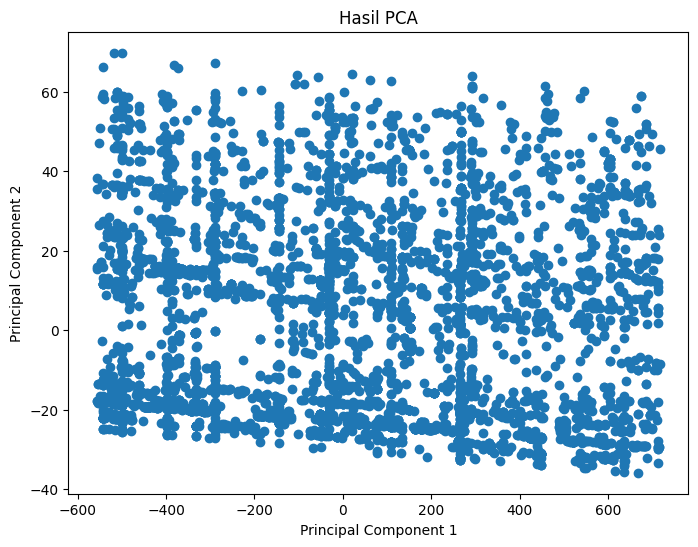

In [ ]:
x = encoded

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

print(principalDF)

plt.figure(figsize=(8, 6))
plt.scatter(principalDF['principal component 1'], principalDF['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil PCA')
plt.show()

In [ ]:
print(encoded)

      diagnosa_enc  institusi_enc  area_enc  rumah_enc  tipe_enc  \
0              404              5         1         44         0   
1              409              2         6         30         0   
2              409              3         6         21         0   
3             1270              3         6         21         0   
4              119              2         6         30         0   
...            ...            ...       ...        ...       ...   
4995          1025              5         1         61         0   
4996           159              2         1         28         0   
4997           104              2         1         28         0   
4998            90              2         1         28         0   
4999           417              3         1         16         0   

      biaya_berobat_enc  
0                     2  
1                    36  
2                     0  
3                     0  
4                    57  
...                 ...  
4

In [ ]:
print(principalDF)

      principal component 1  principal component 2
0               -152.891480             -11.805186
1               -147.748978              15.257978
2               -148.059355             -21.515276
3                712.893497             -29.360171
4               -437.588034              37.568924
...                     ...                    ...
4995             468.557976              37.990089
4996            -398.003613             -16.984171
4997            -452.751921              17.234635
4998            -466.999835             -16.355486
4999            -140.100147             -23.416396

[5000 rows x 2 columns]


In [ ]:
from sklearn.cluster import KMeans

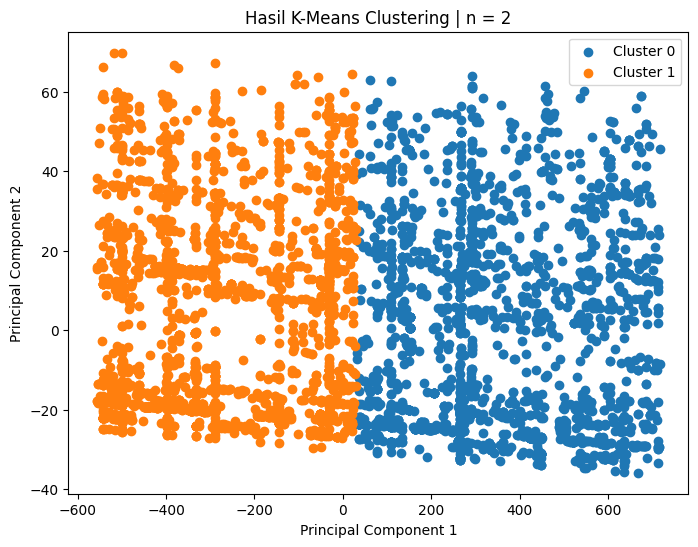

In [ ]:
nClusters = 2
kMeans = KMeans(n_clusters = nClusters)
kMeans.fit(principalDF)

labels = kMeans.labels_
principalDF['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(nClusters):
  plt.scatter(
      principalDF[principalDF['cluster'] == i]['principal component 1'],
      principalDF[principalDF['cluster'] == i]['principal component 2'],
      label = f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil K-Means Clustering | n = 2')
plt.legend()
plt.show()

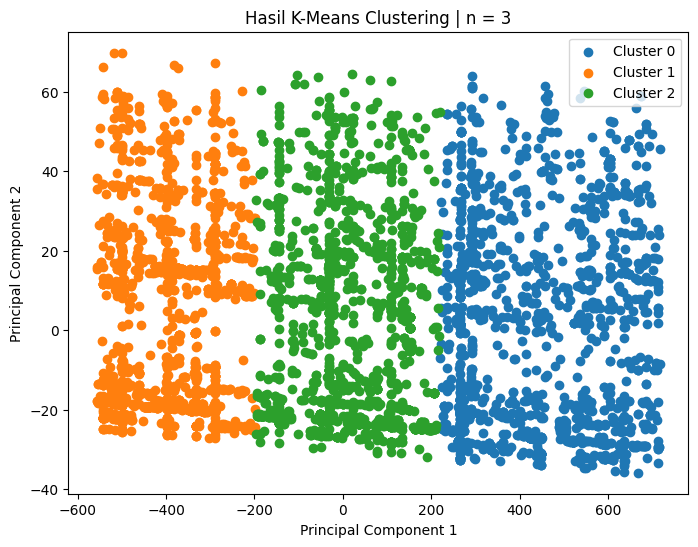

In [ ]:
nClusters = 3
kMeans = KMeans(n_clusters = nClusters)
kMeans.fit(principalDF)

labels = kMeans.labels_
principalDF['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(nClusters):
  plt.scatter(
      principalDF[principalDF['cluster'] == i]['principal component 1'],
      principalDF[principalDF['cluster'] == i]['principal component 2'],
      label = f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil K-Means Clustering | n = 3')
plt.legend()
plt.show()

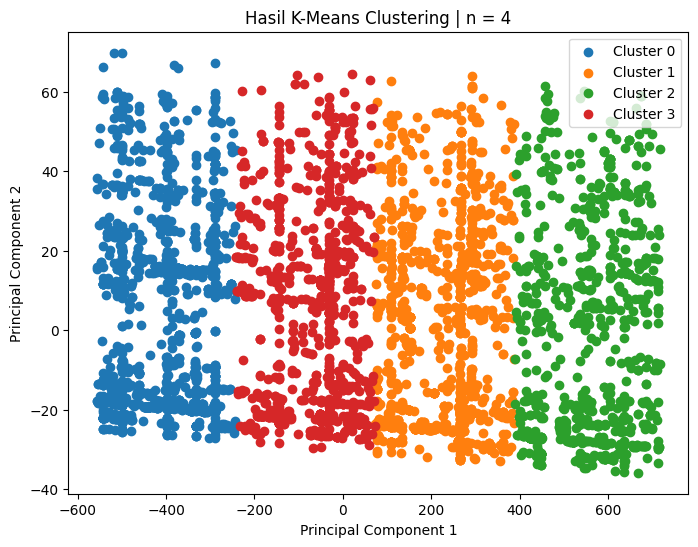

In [ ]:
nClusters = 4
kMeans = KMeans(n_clusters = nClusters)
kMeans.fit(principalDF)

labels = kMeans.labels_
principalDF['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(nClusters):
  plt.scatter(
      principalDF[principalDF['cluster'] == i]['principal component 1'],
      principalDF[principalDF['cluster'] == i]['principal component 2'],
      label = f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil K-Means Clustering | n = 4')
plt.legend()
plt.show()

# **Autoencoder**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def autoencoder(data, epoch):
  # Normalize the data
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # Define the autoencoder architecture
  input_dim = scaled_data.shape[1]  # Number of features
  encoding_dim = 2  # Desired dimensionality of the encoded representation

  input_layer = Input(shape=(input_dim,))
  d_encoded = Dense(encoding_dim, activation='relu')(input_layer)
  d_decoded = Dense(input_dim, activation='sigmoid')(d_encoded)

  autoencoder = Model(input_layer, d_decoded)
  encoder = Model(input_layer, d_encoded)

  # Compile the autoencoder
  autoencoder.compile(optimizer='adam', loss='mse')

  # Train the autoencoder
  autoencoder.fit(scaled_data, scaled_data, epochs=epoch, batch_size=32, shuffle=True) # Adjust epochs and batch_size as needed

  # Encode the data
  encoded_data = encoder.predict(scaled_data)

  # Create a DataFrame for the encoded data
  encoded_df = pd.DataFrame(encoded_data, columns=['encoded_feature_1', 'encoded_feature_2'])

  print(encoded_df.head())

  return encoded_df

auto25 = autoencoder(encoded, 25)
auto50 = autoencoder(encoded, 50)
auto100 = autoencoder(encoded, 100)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1005
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0798
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0695
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0646
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0623
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0591
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0563
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0546
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0537
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0515
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0499
Epoch 12/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0487
Epoch 13/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0476
Epoch 14/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0460
Epoch 15/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [ ]:
print(encoded.head())

   diagnosa_enc  institusi_enc  area_enc  rumah_enc  tipe_enc  \
0           404              5         1         44         0   
1           409              2         6         30         0   
2           409              3         6         21         0   
3          1270              3         6         21         0   
4           119              2         6         30         0   

   biaya_berobat_enc  
0                  2  
1                 36  
2                  0  
3                  0  
4                 57  


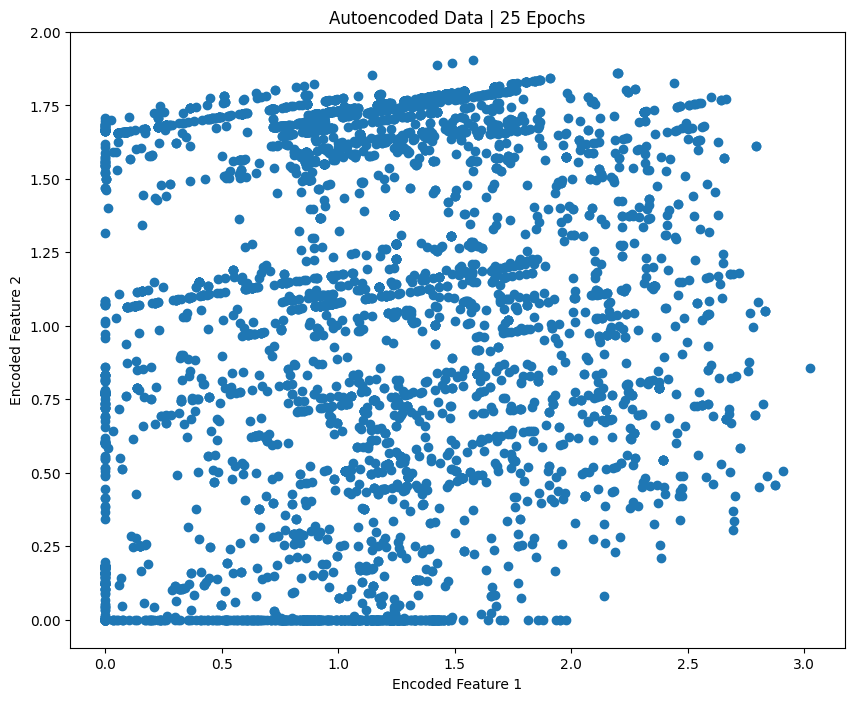

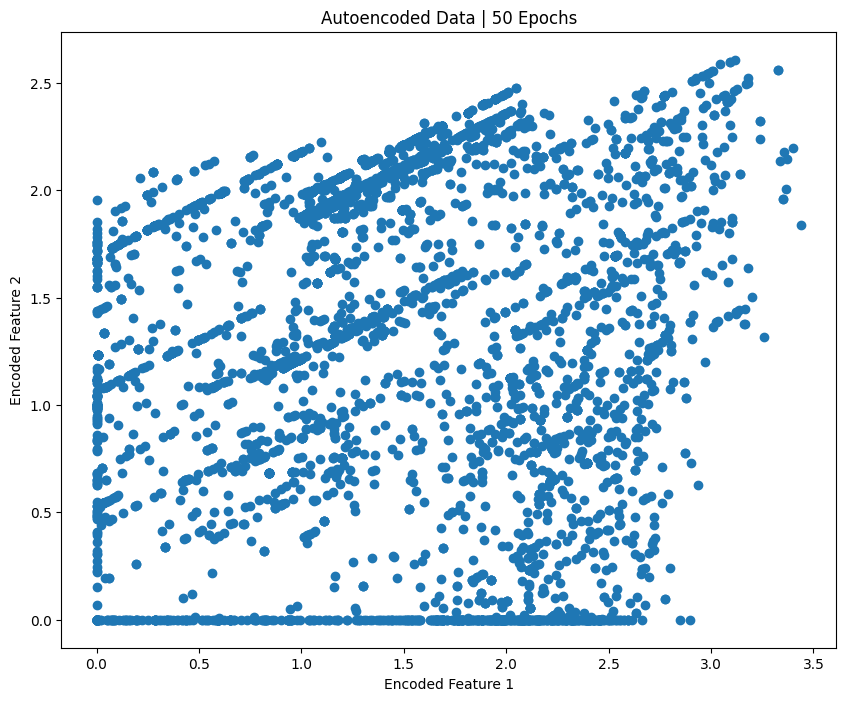

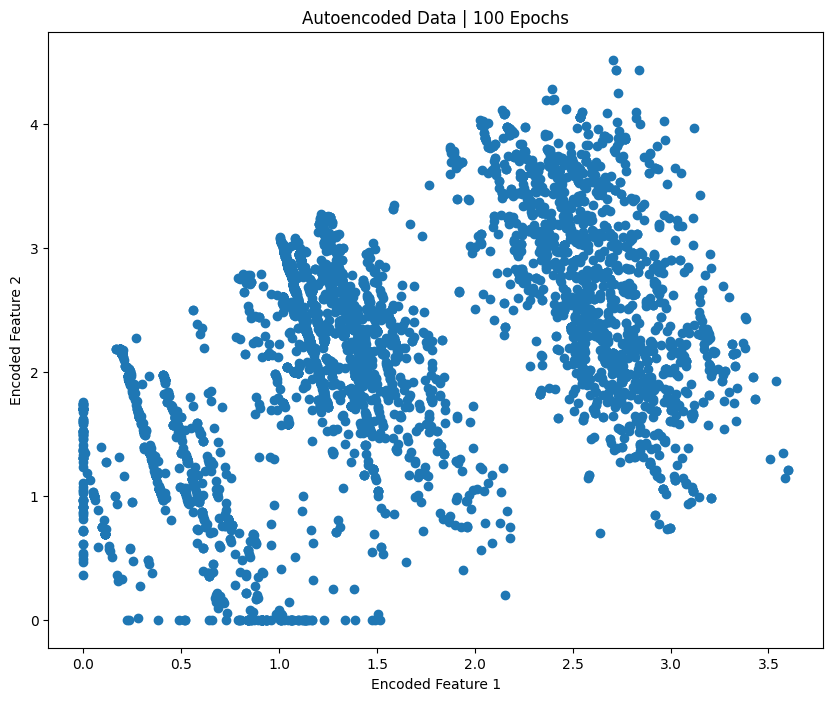

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(auto25['encoded_feature_1'], auto25['encoded_feature_2'])
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title('Autoencoded Data | 25 Epochs')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(auto50['encoded_feature_1'], auto50['encoded_feature_2'])
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title('Autoencoded Data | 50 Epochs')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(auto100['encoded_feature_1'], auto100['encoded_feature_2'])
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title('Autoencoded Data | 100 Epochs')
plt.show()

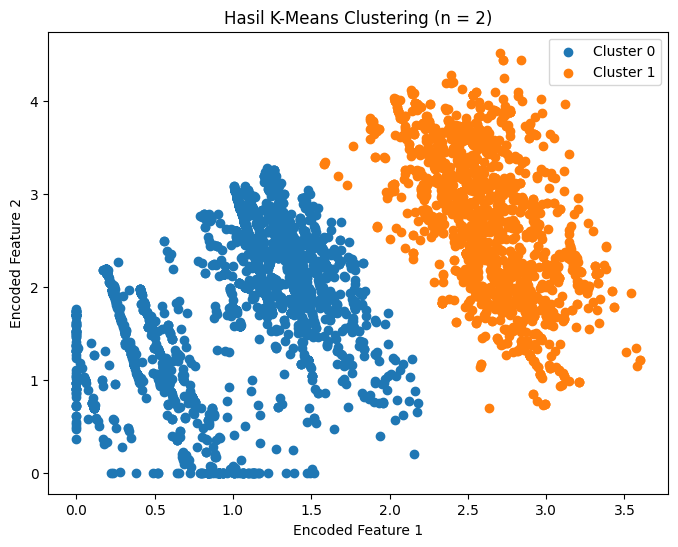

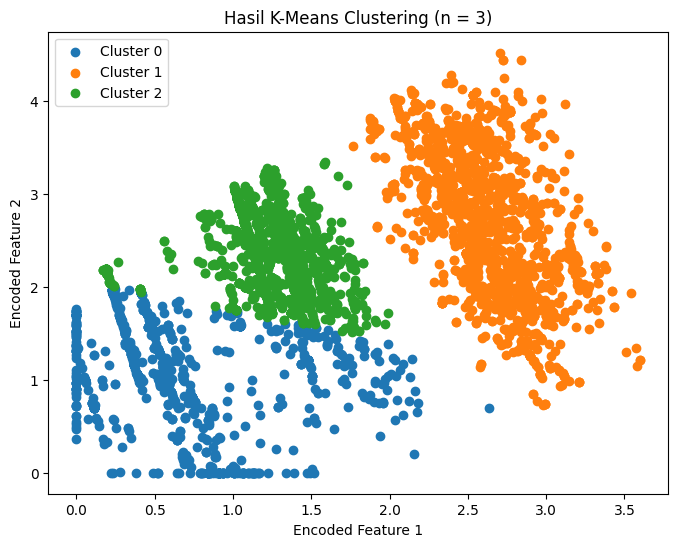

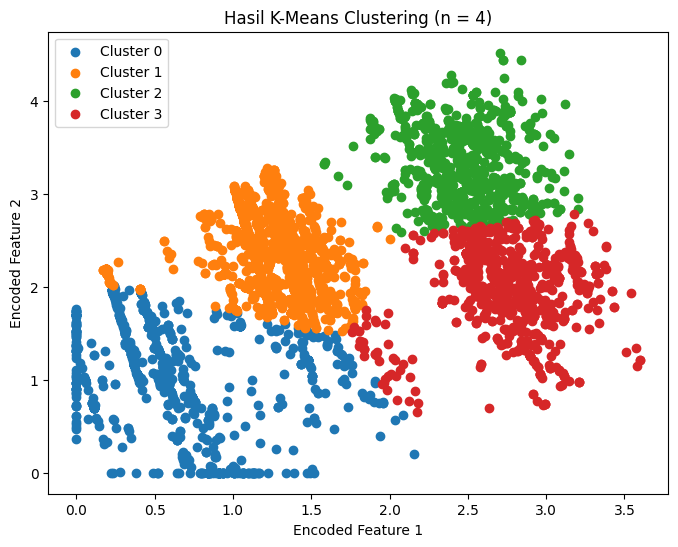

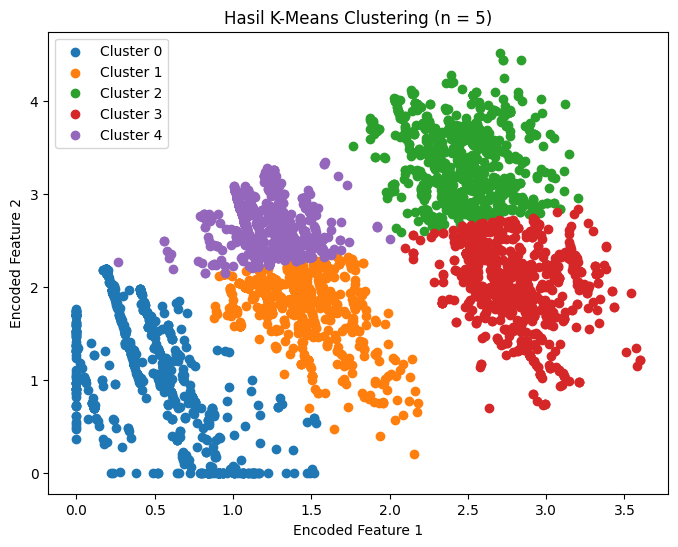

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# open from file (if already saved)
auto100 = pd.read_excel('/content/Autoencode100Epoch.xlsx')

def kClusterResult(nClusters, df):
  newAutoencoded = auto100.copy()

  kMeans = KMeans(n_clusters = nClusters)
  kMeans.fit(newAutoencoded)

  labels = kMeans.labels_
  newAutoencoded['cluster'] = labels

  plt.figure(figsize=(8, 6))
  for i in range(nClusters):
    plt.scatter(
        newAutoencoded[newAutoencoded['cluster'] == i]['encoded_feature_1'],
        newAutoencoded[newAutoencoded['cluster'] == i]['encoded_feature_2'],
        label = f'Cluster {i}')

  plt.xlabel('Encoded Feature 1')
  plt.ylabel('Encoded Feature 2')
  plt.title(f'Hasil K-Means Clustering (n = {nClusters})')
  plt.legend()

  plt.show()

kClusterResult(2, auto100)
kClusterResult(3, auto100)
kClusterResult(4, auto100)
kClusterResult(5, auto100)

In [ ]:
# Save the best autoencoding result for later use
outputFilePath = '/content/Autoencode100Epoch.xlsx'
auto100.to_excel(outputFilePath, index=False)

# **Analisis k-Means dan Autoencoder**

Dari tiga model autoencoder yang dilatih (25 epoch, 50 epoch, dan 100 epoch), hasil visualisasi menunjukkan model 100 epoch adalah model yang terbaik untuk dilakukan clustering menggunakan k-Means.

Dari kedua hasil clustering menggunakan k-Means, hasil dengan 2 cluster menunjukkan hasil cluster yang lebih baik dibandingkan hasil n cluster 3, 4, atau 5.